In [1]:
import pandas as pd

data = pd.read_csv("thanksgiving-2015-poll-data.csv", encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [2]:
data["Do you celebrate Thanksgiving?"].unique()

array([u'Yes', u'No'], dtype=object)

In [3]:
data.shape

(1058, 65)

In [4]:
data["What is your gender?"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [6]:
import math

def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

In [7]:
data["gender"] = data["What is your gender?"].apply(gender_code)
data["gender"].value_counts(dropna=False)

 1.0    544
 0.0    481
NaN      33
Name: gender, dtype: int64

In [8]:
data.apply(lambda x: x.dtype).head()

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [9]:
import numpy as np

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2

In [10]:
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head()

0     87499.0
1     62499.0
2      4999.0
3    200000.0
4    112499.0
Name: income, dtype: float64

In [11]:
data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [12]:
homemade = data[data["What type of cranberry saucedo you typically have?"] == "Homemade"]
canned = data[data["What type of cranberry saucedo you typically have?"] == "Canned"]

In [13]:
print(homemade["income"].mean())
print(canned["income"].mean())

94877.67206477733
83822.94318181818


In [14]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped

In [15]:
grouped.groups

{u'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 u'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 u'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 u'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [16]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [17]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [19]:
grouped.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic,0.0,87499.0
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central,1.0,62499.0
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,0.0,4999.0
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,0.0,200000.0
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific,0.0,112499.0
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific,0.0,4999.0
6,4337924420,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,Yes,No,Rural,18 - 29,Male,"$25,000 to $49,999",East North Central,0.0,37499.0
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain,0.0,NaN
8,4337914977,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$75,000 to $99,999",Middle Atlantic,0.0,87499.0
9,4337899817,Yes,Other (please specify),Turkey and Ham,Baked,NaN,Bread-based,NaN,Other (please specify),Both Canned and Homemade,...,No,Yes,Yes,Suburban,30 - 44,Male,"$25,000 to $49,999",East South Central,0.0,37499.0


In [20]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic,0.0,87499.0
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central,1.0,62499.0
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,0.0,4999.0
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,0.0,200000.0
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific,0.0,112499.0


In [21]:
grouped["income"]

In [22]:
grouped["income"].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83822.943182
Homemade                  94877.672065
None                      78885.613445
Other (please specify)    86629.521739
Name: income, dtype: float64

In [23]:
grouped.income

In [24]:
data.income

0        87499.0
1        62499.0
2         4999.0
3       200000.0
4       112499.0
5         4999.0
6        37499.0
7            NaN
8        87499.0
9        37499.0
10       37499.0
11       37499.0
12        4999.0
13        4999.0
14       62499.0
15      200000.0
16      200000.0
17       87499.0
18       37499.0
19       87499.0
20       87499.0
21        4999.0
22        4999.0
23        4999.0
24       62499.0
25      200000.0
26       62499.0
27      112499.0
28           NaN
29       87499.0
          ...   
1028         NaN
1029     62499.0
1030     17499.0
1031     87499.0
1032         NaN
1033     87499.0
1034         NaN
1035     37499.0
1036     62499.0
1037     17499.0
1038    112499.0
1039     87499.0
1040     62499.0
1041     37499.0
1042    137499.0
1043     87499.0
1044     37499.0
1045     87499.0
1046     17499.0
1047     37499.0
1048     87499.0
1049         NaN
1050    137499.0
1051    137499.0
1052      4999.0
1053    112499.0
1054     62499.0
1055    112499

In [25]:
grouped.agg(np.mean)

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,83822.943182
Homemade,4.336792e+09,0.533101,94877.672065
None,4.336765e+09,0.517483,78885.613445
Other (please specify),4.336763e+09,0.640000,86629.521739


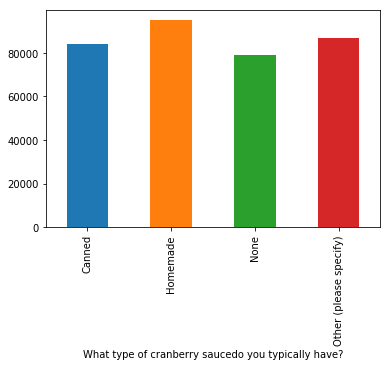

In [26]:
%matplotlib inline

sauce = grouped.agg(np.mean)
sauce["income"].plot(kind="bar")

In [27]:
grouped = data.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.642857   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

In [28]:
grouped["income"].agg([np.mean, np.sum, np.std]).head(10)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.200000   
                                                   Ham/Pork                                             77499.071429   
                                                   I don't know                                          4999.000000   
                                                   Other (please specify)                               53213.285714   
                                                   Roast beef                                           25499.000000   
                                                   Tofurkey                                            100713.428571   
                                                   Turkey                                               85242.221945   
Homemade                                           Chicken                                              19999.000000   
                                                   Ham/Pork                                             96874.250000   
                                                   I don't know                                                  NaN   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404996.0   
                                                   Ham/Pork                                             1084987.0   
                                                   I don't know                                            4999.0   
                                                   Other (please specify)                                372493.0   
                                                   Roast beef                                            127495.0   
                                                   Tofurkey                                              704994.0   
                                                   Turkey                                              34182131.0   
Homemade                                           Chicken                                                59997.0   
                                                   Ham/Pork                                              387497.0   
                                                   I don't know                                               0.0   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.677356  
                                                   Ham/Pork                                            56645.147121  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538  
                                                   Tofurkey                                            61351.619299  
                                                   Turkey                                              55687.518532  
Homemade                                           Chicken                                             16393.596311  
                                                   Ham/Pork                           

In [29]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x:x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        Tofurkey                    3
                                        I don't know                3
                                        Chicken                     2
                                        Turducken                   2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           